In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cust_df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
cust_df.shape


(7043, 21)

In [4]:
cust_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
cust_df.keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
cust_df.drop(["customerID"], axis=1, inplace=True)

In [7]:
for val in cust_df.columns:
    
    print(cust_df[val].value_counts())
    print("====================================================")

Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No            

In [8]:
corr=cust_df.corr()

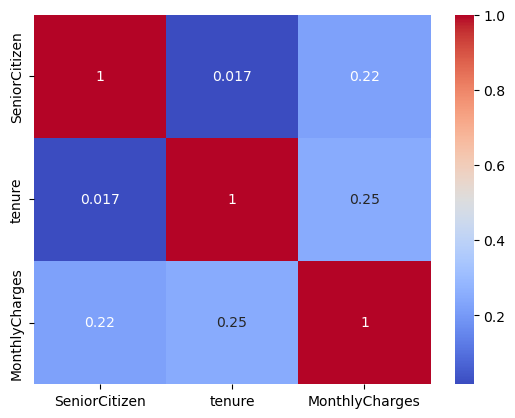

In [9]:
sns.heatmap(data=corr, cmap="coolwarm",annot=True)
plt.show()


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()

In [12]:
for obj in cust_df.columns:
    if cust_df[obj].dtypes=="object":
        cust_df[obj]=le.fit_transform(cust_df[obj])

In [13]:
cust_df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

In [14]:
# Deleting the outliers in the data. 

In [15]:
# Observing outliers using box plot

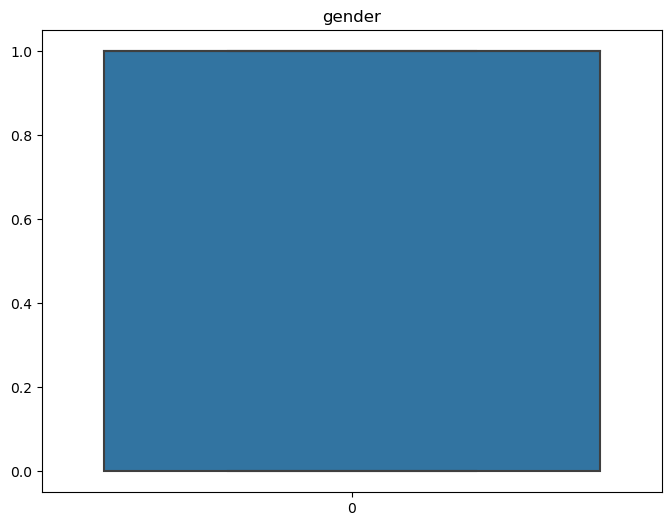

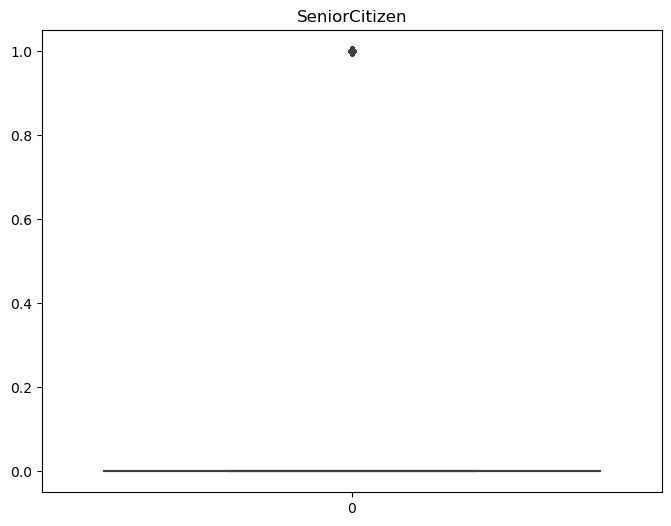

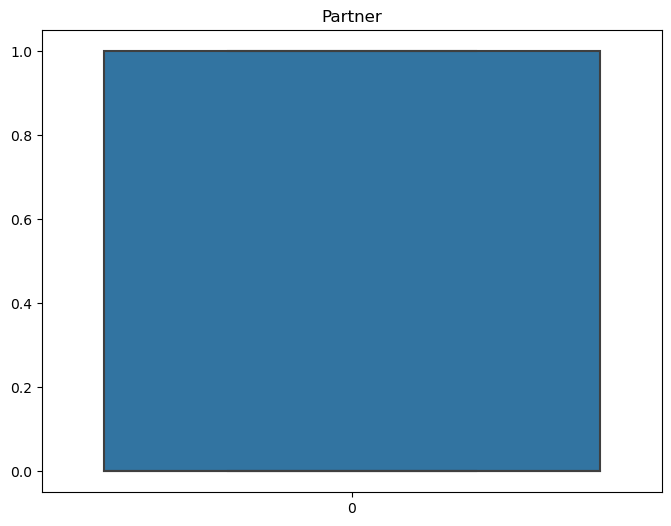

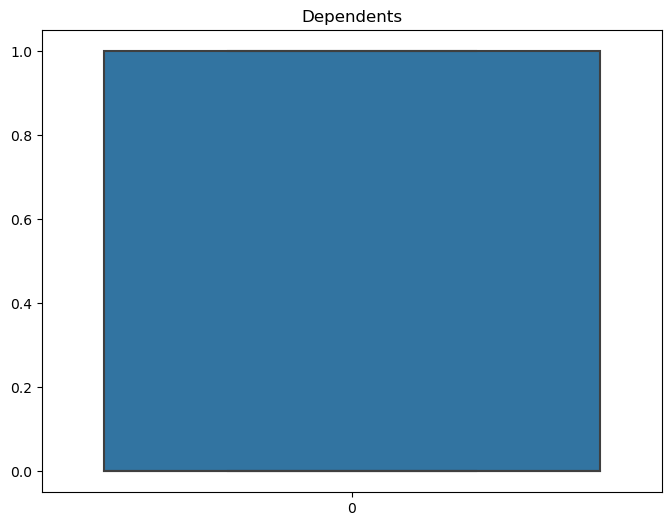

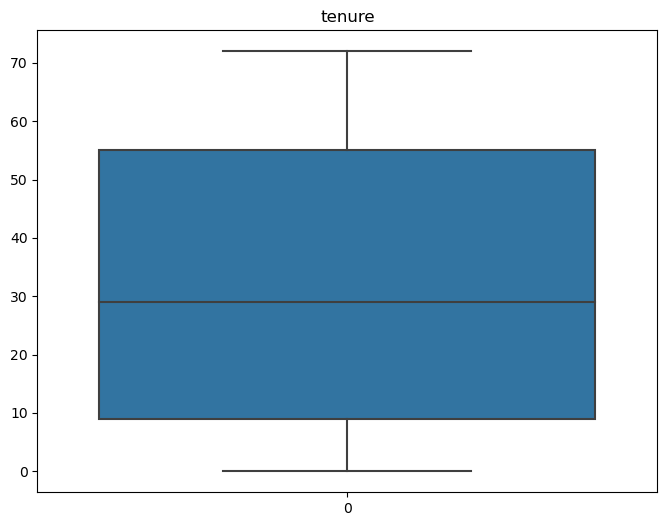

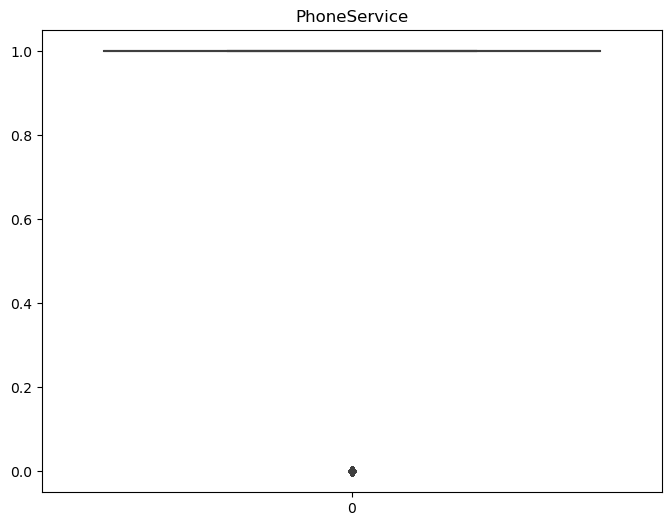

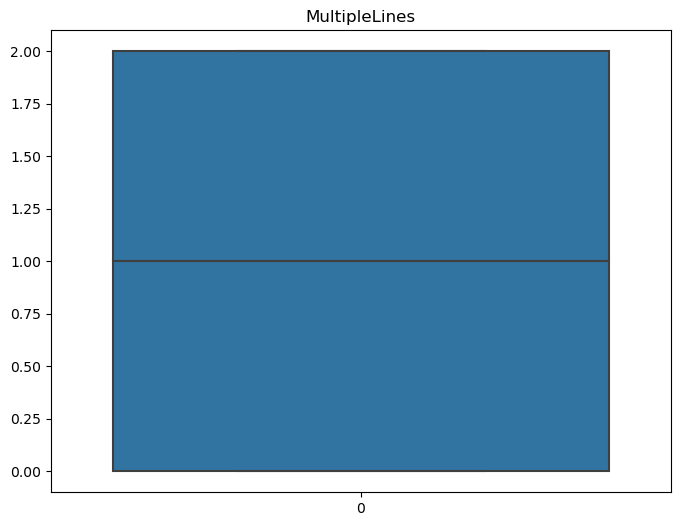

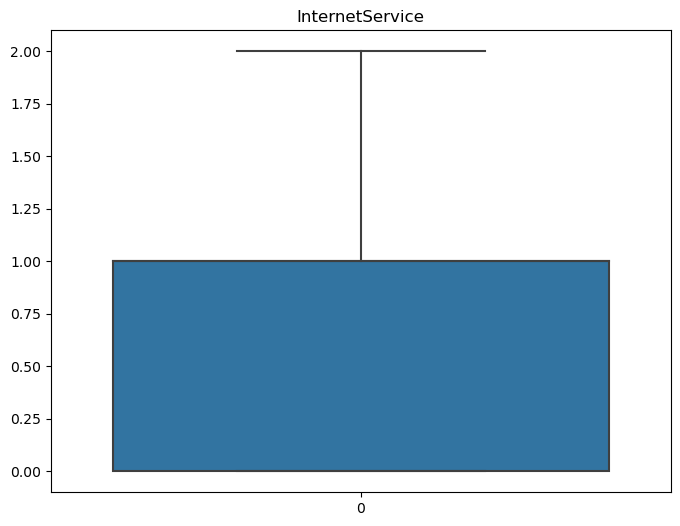

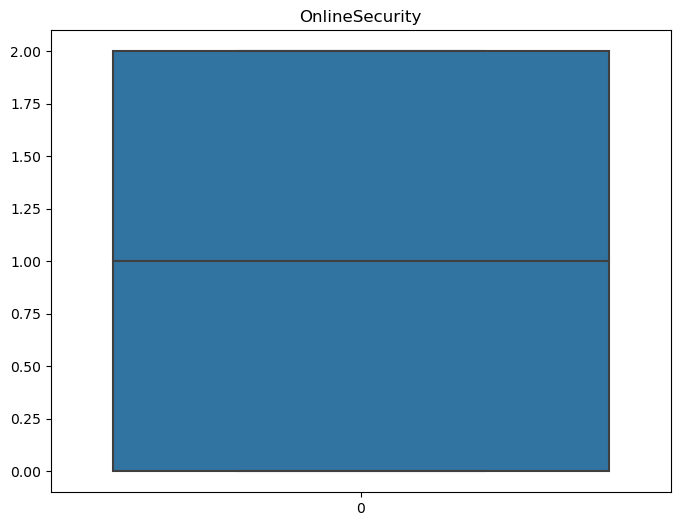

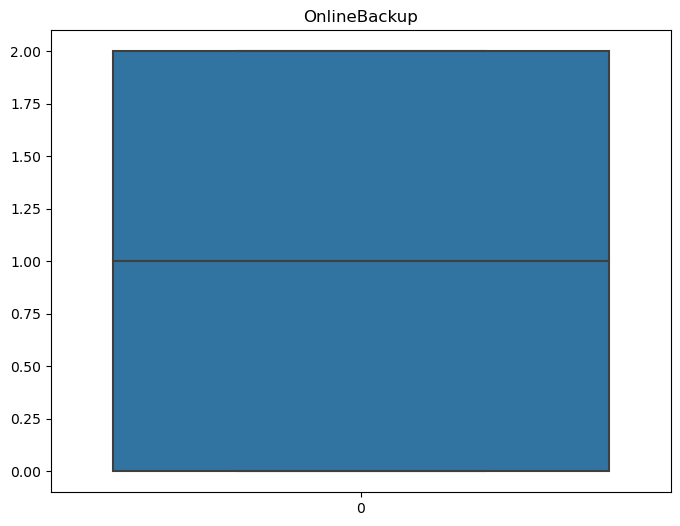

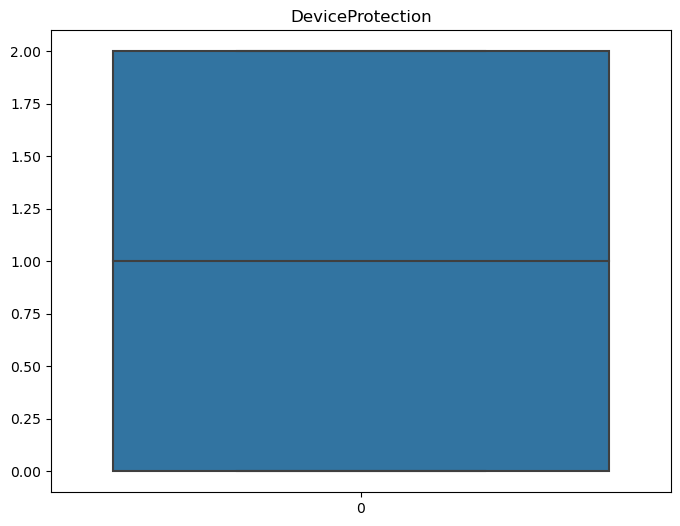

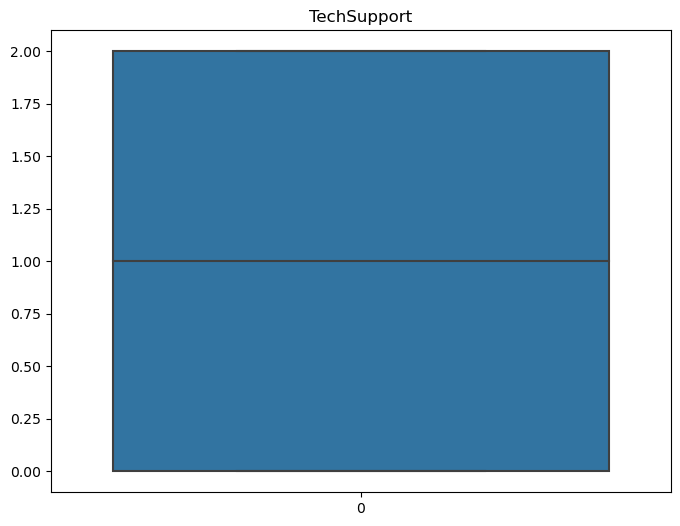

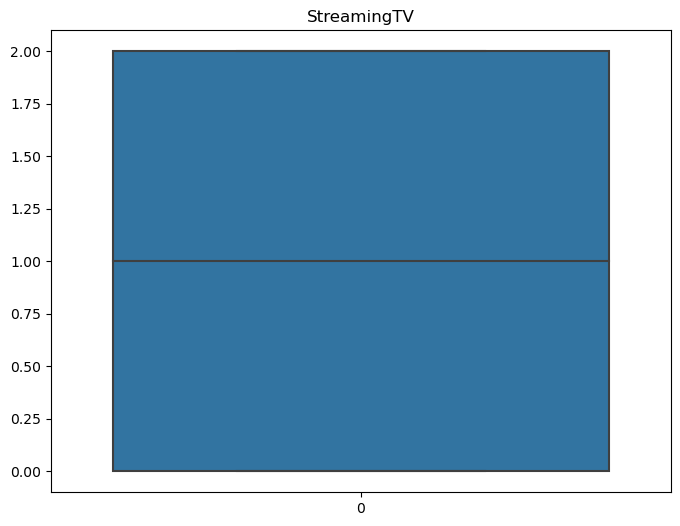

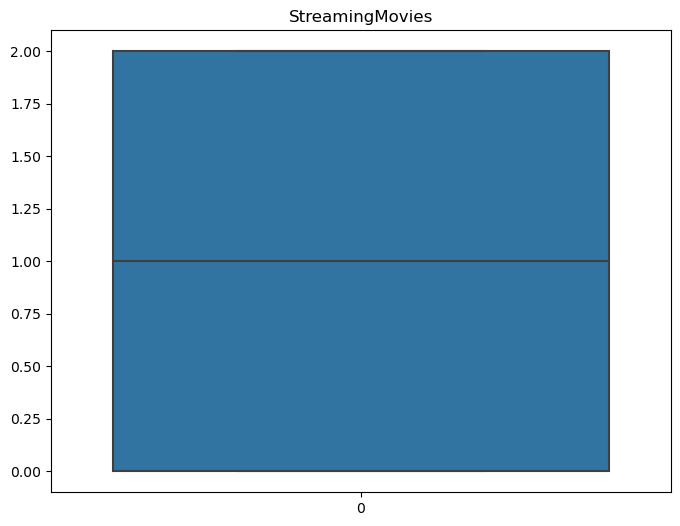

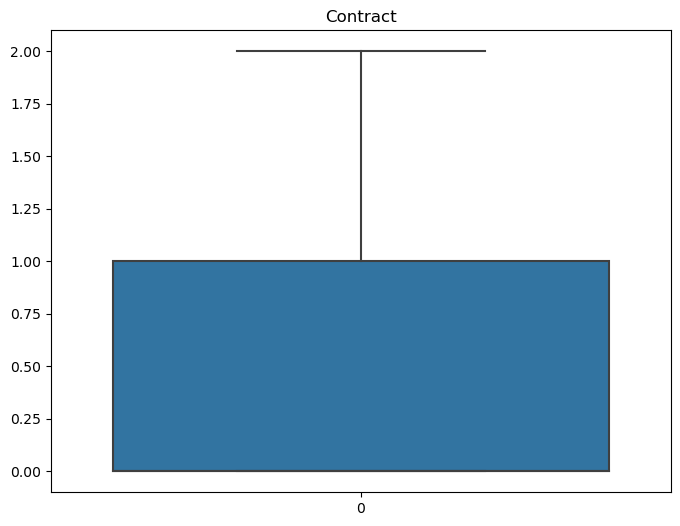

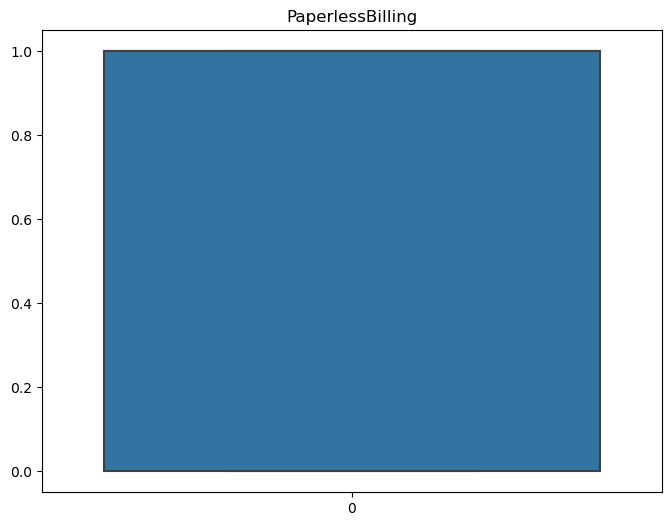

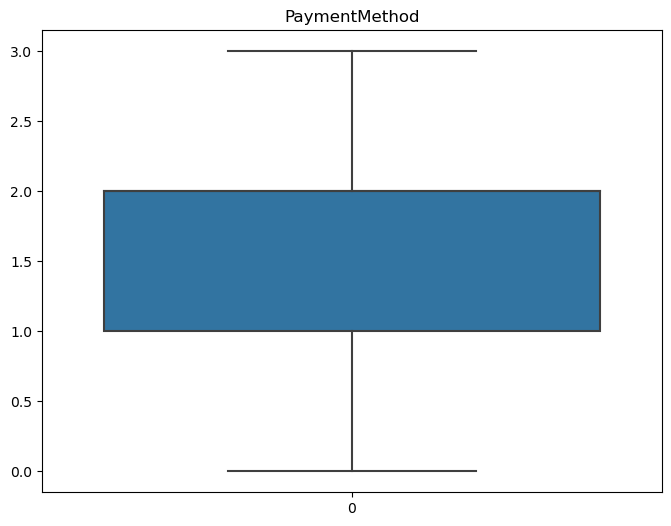

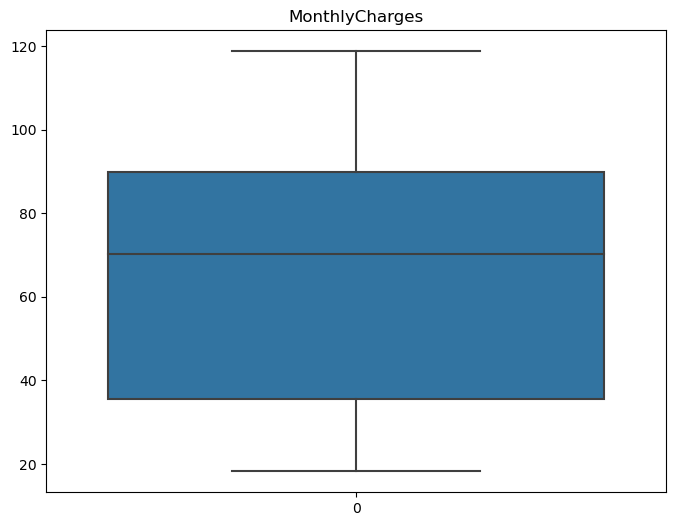

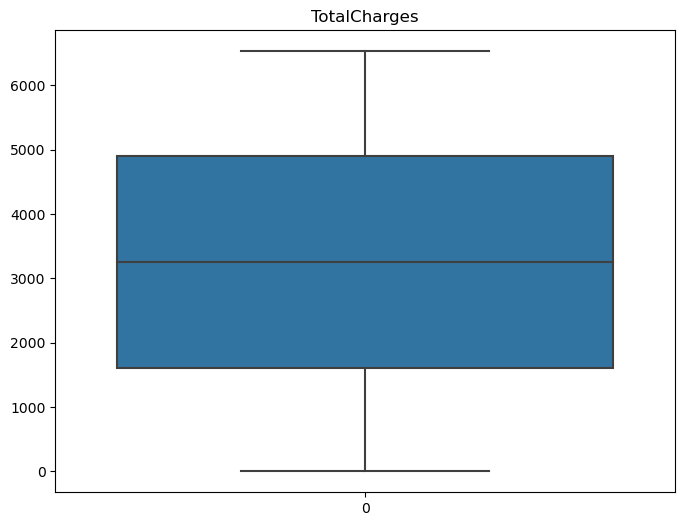

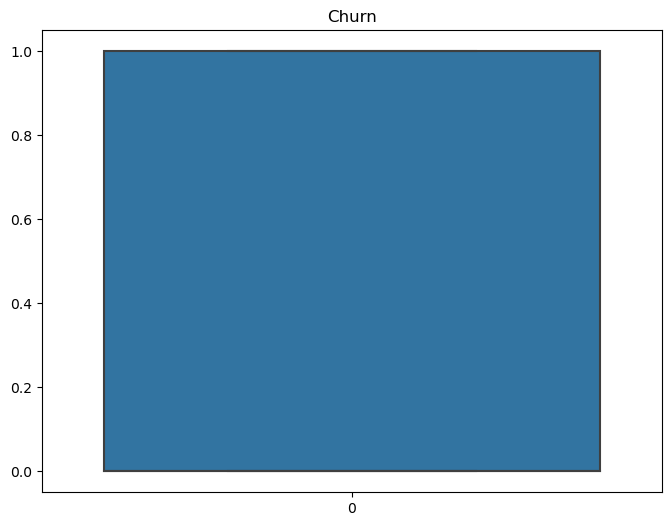

In [16]:
for box in cust_df.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=cust_df[box])
    plt.title(box)
    plt.show()

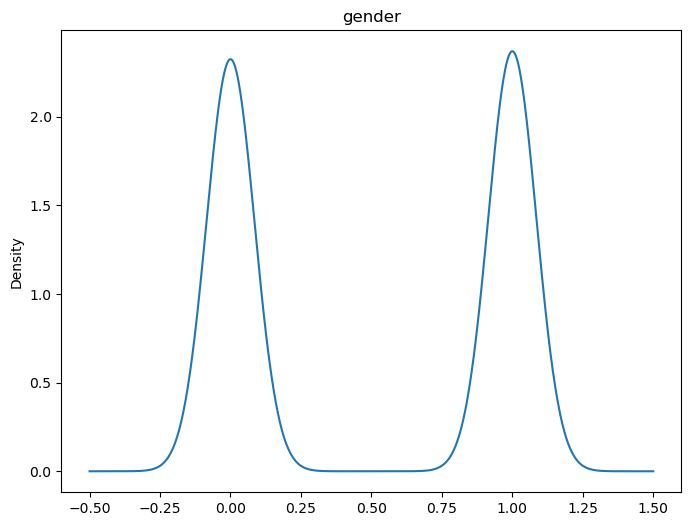

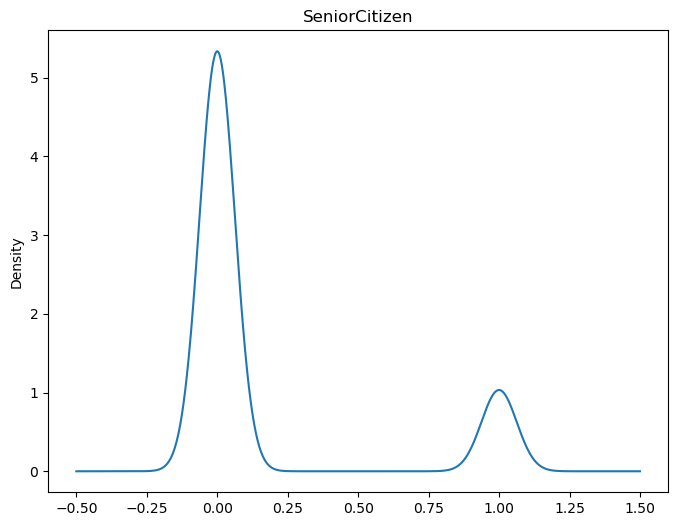

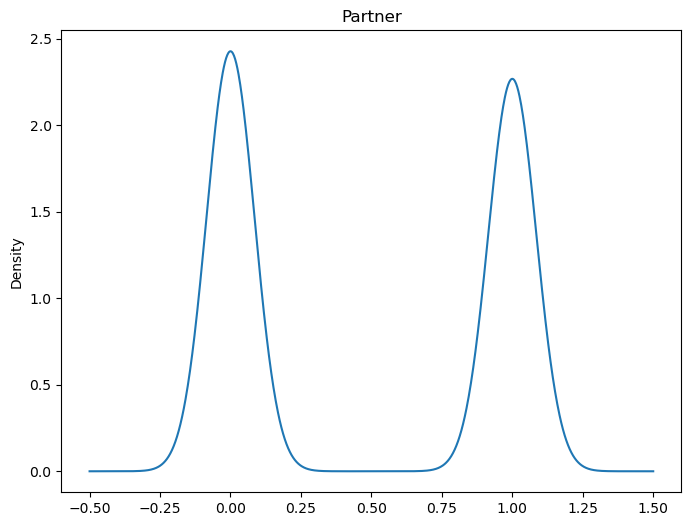

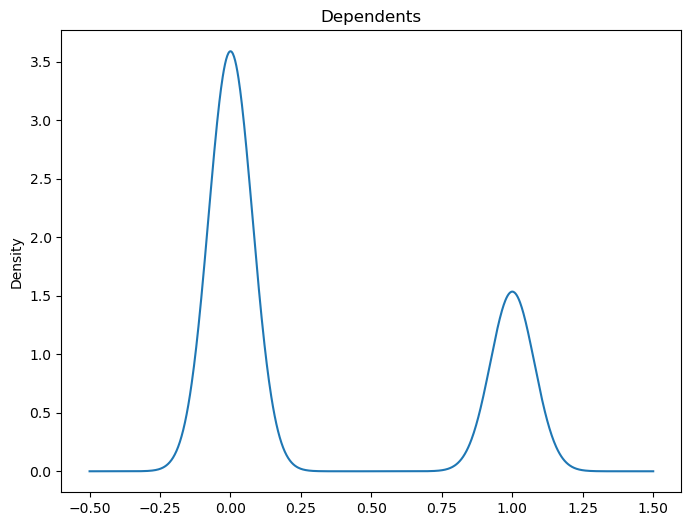

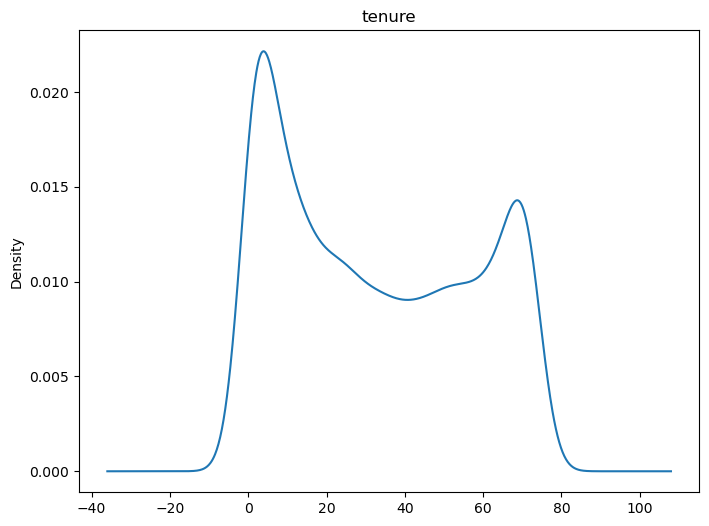

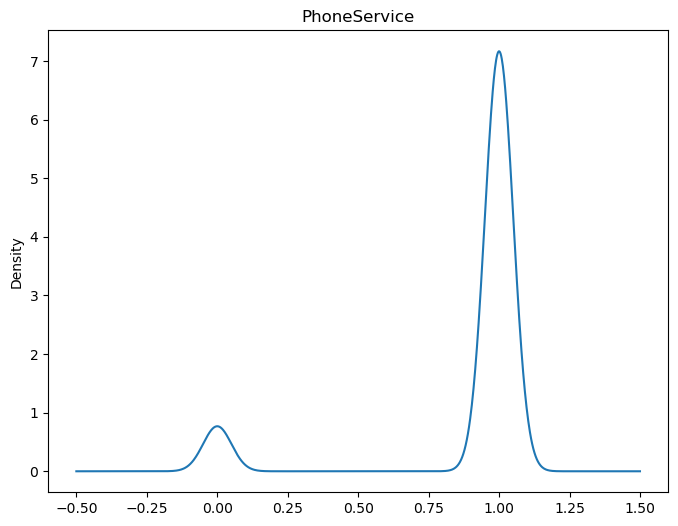

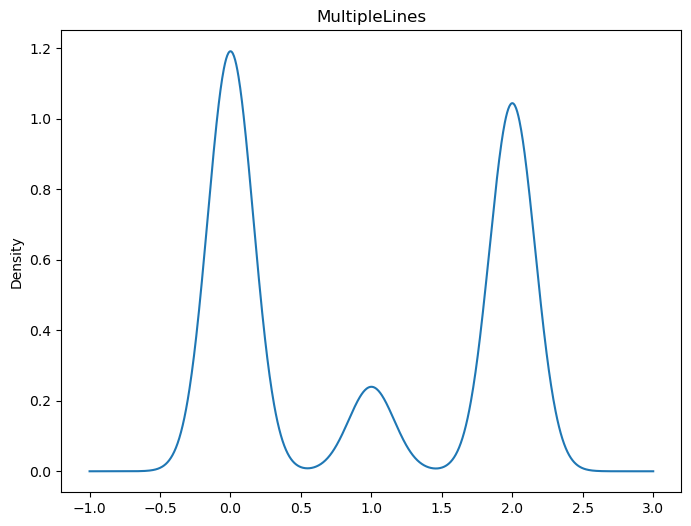

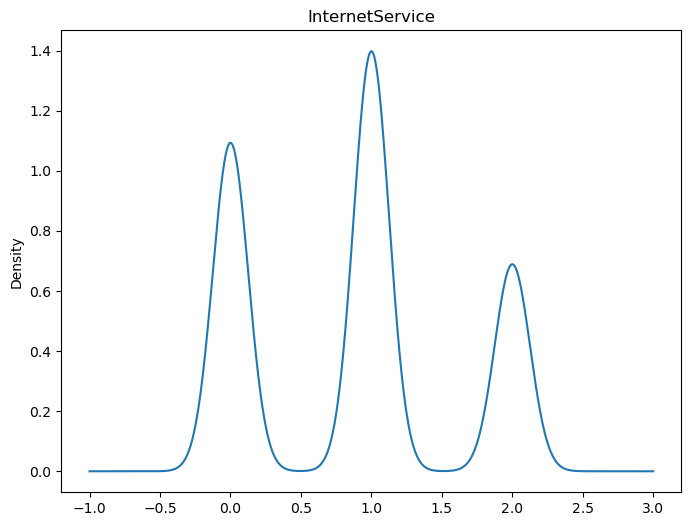

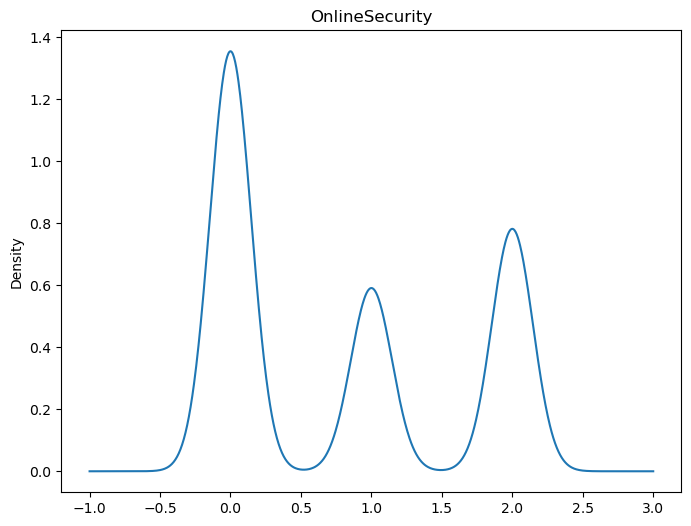

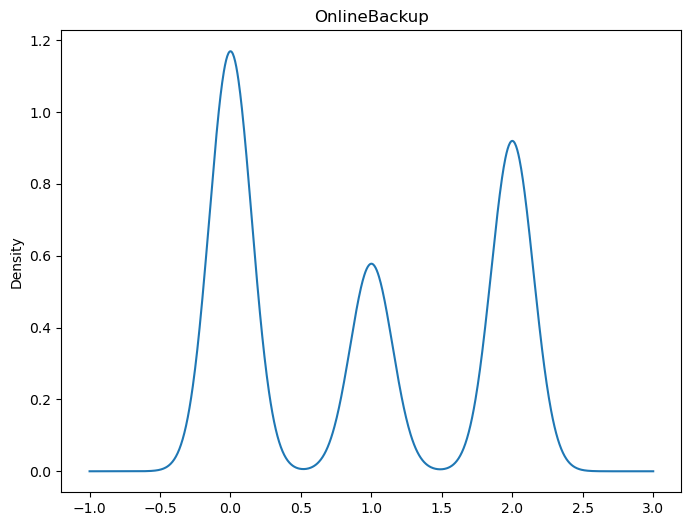

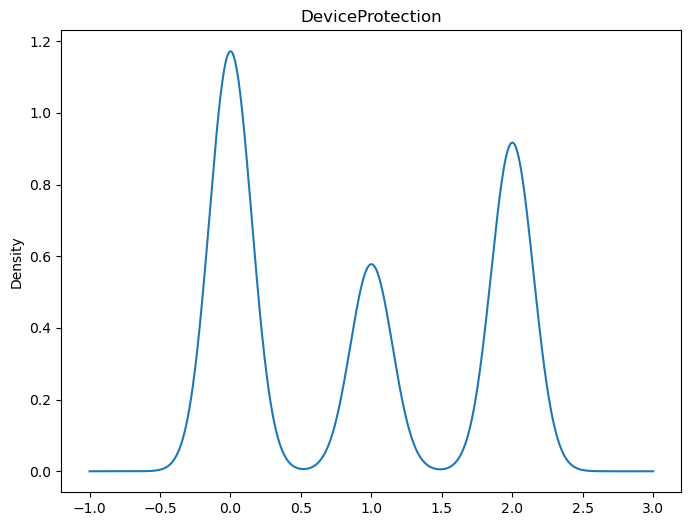

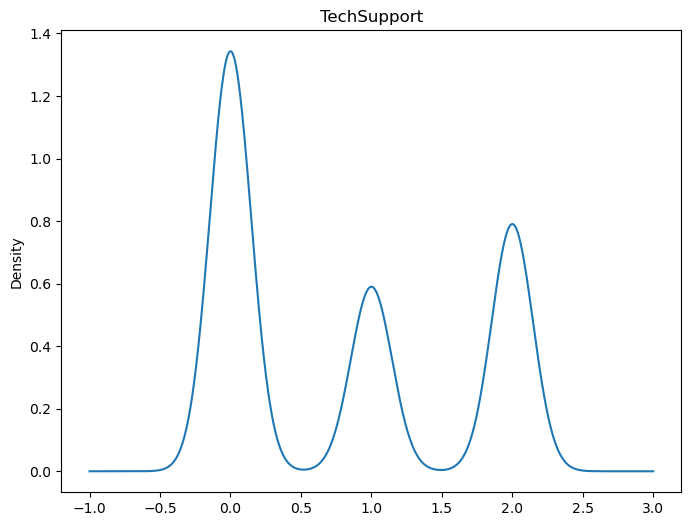

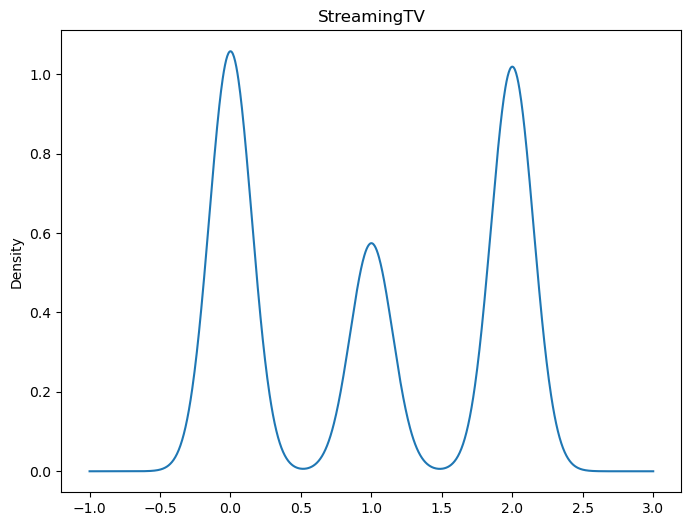

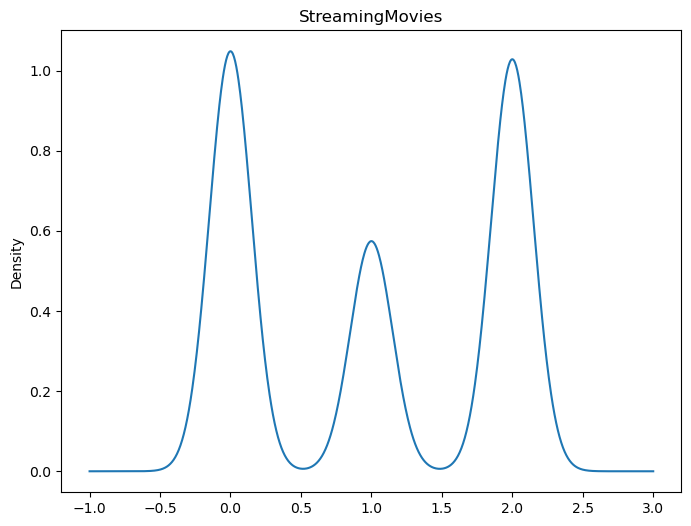

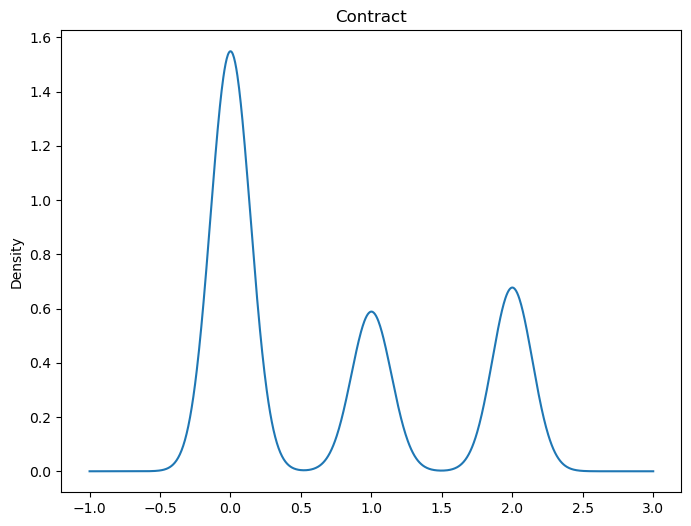

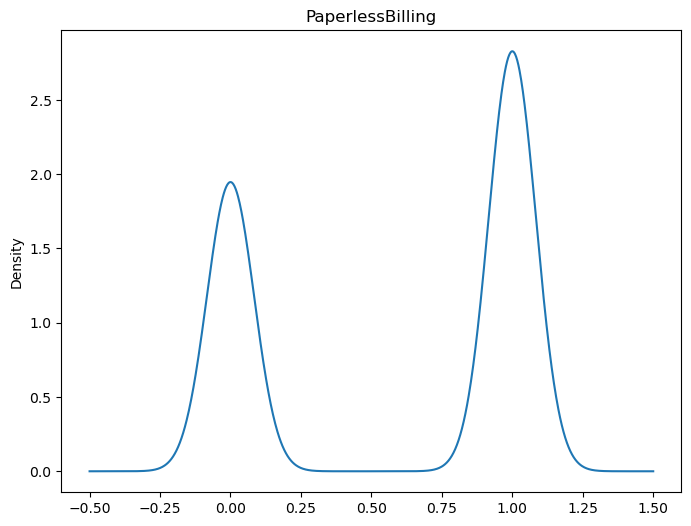

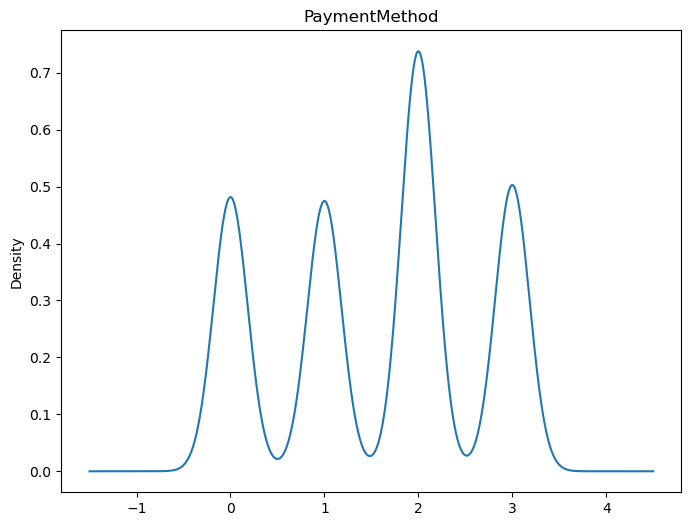

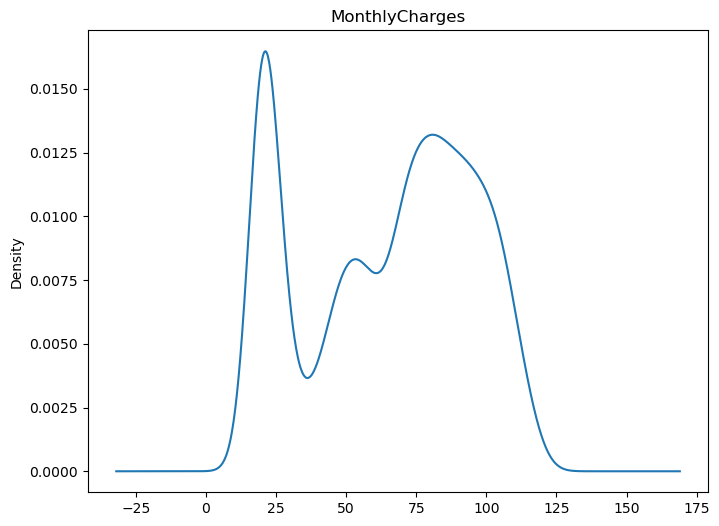

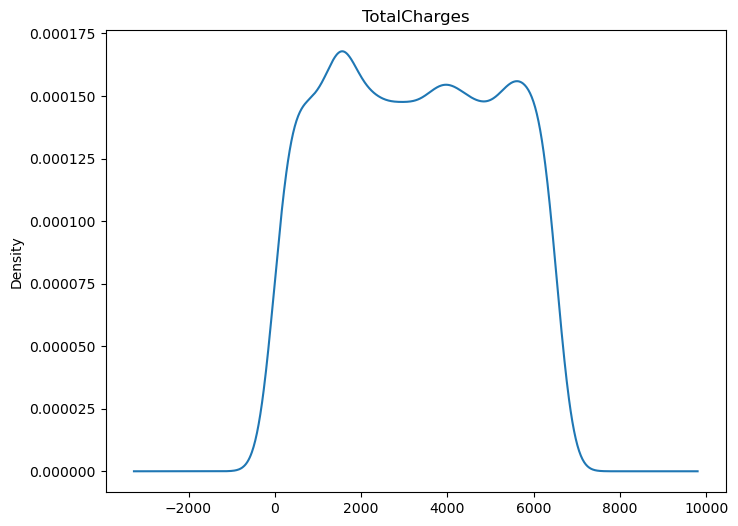

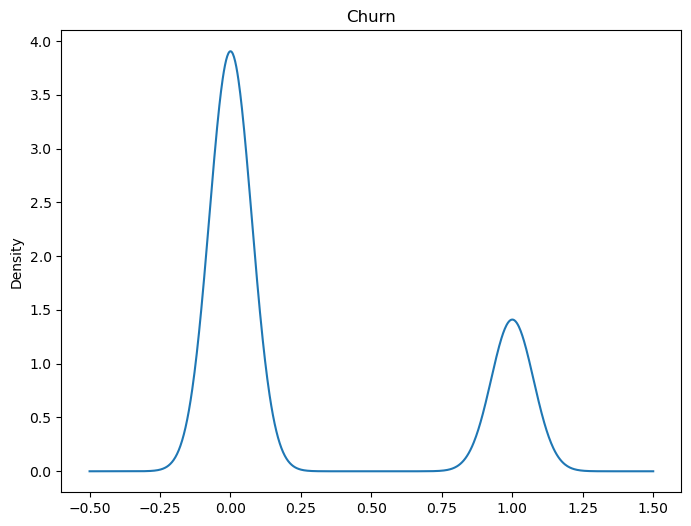

In [17]:
for kde in cust_df.columns:
    plt.figure(figsize=(8,6))
    cust_df[kde].plot(kind="kde")
    plt.title(kde)
    plt.show()

In [18]:
# Treating the outliers

In [19]:
for out in cust_df.columns:
    q1=np.percentile(cust_df[out],25)
    q3=np.percentile(cust_df[out],75)
    iqr=q3-q1
    lb=q1-1.5*iqr
    ob=q3+1.5*iqr
    cust_df2=cust_df[(cust_df[out]>= lb) & (cust_df[out] <= ob)]

In [20]:
print(cust_df.shape)
print(cust_df2.shape)

(7043, 20)
(7043, 20)


In [21]:
output_data=[]

for col in cust_df2.columns:
    if cust_df2.loc[:,col].nunique()<=5:
        unique_values=cust_df2.loc[:,col].unique()
        output_data.append([col,cust_df2.loc[:,col].nunique(),unique_values,cust_df2.loc[:,col].dtype])
        
    else:
        output_data.append([col,cust_df2.loc[:,col].nunique(),"---",cust_df2.loc[:,col].dtype])
        
output_df=pd.DataFrame(output_data,columns=["Feature name","Number of Unique Values","Unique Values","Data Type"])
output_df

,Feature name,Number of Unique Values,Unique Values,Data Type
0,gender,2,"[0, 1]",int32
1,SeniorCitizen,2,"[0, 1]",int64
2,Partner,2,"[1, 0]",int32
3,Dependents,2,"[0, 1]",int32
4,tenure,73,---,int64
5,PhoneService,2,"[0, 1]",int32
6,MultipleLines,3,"[1, 0, 2]",int32
7,InternetService,3,"[0, 1, 2]",int32
8,OnlineSecurity,3,"[0, 2, 1]",int32
9,OnlineBackup,3,"[2, 0, 1]",int32


In [22]:
corr=cust_df2.corr()

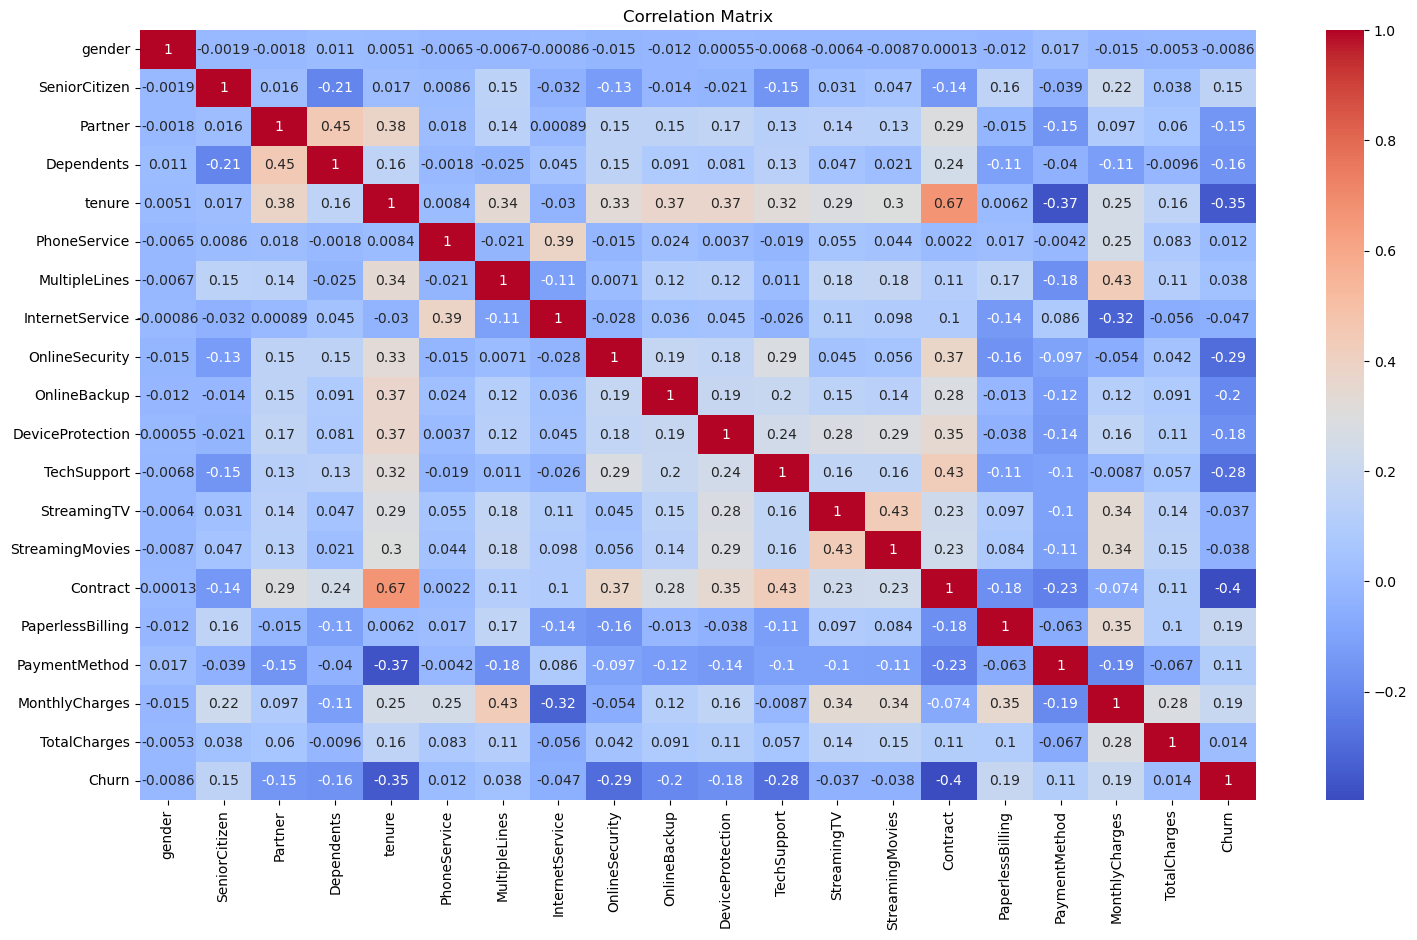

In [23]:
plt.figure(figsize=(18,10))
sns.heatmap(data=corr, cmap="coolwarm",annot=True)
plt.title("Correlation Matrix")
plt.show()

In [24]:
# there is a correlation between Contract and tenure, 
# monthly charge and mutiple lines, streaming movies and streaming tv, contract and tech support
# partners and dependents, contract and online security, partner and tenure

In [25]:
cust_df2.keys()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [26]:
cust_df2.drop([ "MultipleLines",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies"],axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,1,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,0,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,1,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,1,0,1,3,74.40,2660,1


In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [28]:
ld=LinearDiscriminantAnalysis()

In [29]:
X=cust_df2.drop(["Churn"],axis=1)

In [30]:
y=cust_df2["Churn"]

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)

# LOGISTIC REGRESSION MODEL

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
log_reg_model=LogisticRegression()

In [35]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
log_reg_model.fit(X_train,y_train)

LogisticRegression()

In [37]:
y_test_pred_lr=log_reg_model.predict(X_test)

In [38]:
y_train_pred_lr=log_reg_model.predict(X_train)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [40]:
accuracy_lr_train=accuracy_score(y_train,y_train_pred_lr)
accuracy_lr=accuracy_score(y_test,y_test_pred_lr)

In [41]:
print("The accuracy of the log reg model with test data set is : ", accuracy_lr)
print("The accuracy of the log reg model with train data set is : ", accuracy_lr_train)

The accuracy of the log reg model with test data set is :  0.7906316536550745
The accuracy of the log reg model with train data set is :  0.7978345757898474


In [42]:
confusion_matrix_lr=confusion_matrix(y_test,y_test_pred_lr)


In [43]:
print(confusion_matrix_lr)

[[920 115]
 [180 194]]


In [44]:
cm=[[920,115],[180,194]]

In [45]:
matrix=pd.DataFrame(cm, index=["Actual Churn","Actual No Churn"], columns=["Predicted Churn ","Prediction No churn"])

In [46]:
matrix

,Predicted Churn,Prediction No churn
Actual Churn,920,115
Actual No Churn,180,194


In [47]:
ActVsPredLr=pd.DataFrame({"Actual":y_test,"Predicted":y_test_pred_lr})

In [48]:
ActVsPredLr.head(5)

,Actual,Predicted
6091,1,1
745,0,0
5130,1,0
5616,0,0
6647,0,0


# SVM :Support Vector Machines

In [49]:
from sklearn.svm import SVC

In [50]:
sv_m= SVC(kernel='poly')

In [51]:
sv_m.fit(X_train,y_train)

SVC(kernel='poly')

In [52]:
y_svm_test_pred=sv_m.predict(X_test)

In [53]:
y_svm_train_pred=sv_m.predict(X_train)

In [54]:
svm_accuracy=accuracy_score(y_test,y_svm_test_pred)
print("The accuracy score of the SVM model with test dataset is: ",svm_accuracy)

The accuracy score of the SVM model with test dataset is:  0.7345635202271115


In [55]:
svm_accuracy_train=accuracy_score(y_train,y_svm_train_pred)
print("The accuracy score of the SVM model with train dataset is: ",svm_accuracy_train)

The accuracy score of the SVM model with train dataset is:  0.7346467873624423


In [56]:
from sklearn.metrics import precision_score

In [57]:
print("The precision score for the svm model is:", precision_score(y_test,y_svm_test_pred))

The precision score for the svm model is: 0.0


In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
min_max=MinMaxScaler()

In [60]:
X2=min_max.fit_transform(X)

# Applying the Logreg model with X2

In [61]:
logr2=LogisticRegression()

In [62]:
x_train,x_test,Y_train,Y_test=train_test_split(X2,y,test_size=0.2,random_state=25)

In [63]:
logr2.fit(x_train,Y_train)

LogisticRegression()

In [64]:
Y_lr_test_pred=logr2.predict(x_test)
Y_lr_train_pred=logr2.predict(x_train)

In [65]:
accuracy_lr2=accuracy_score(Y_test,Y_lr_test_pred)
accuracy_lr2_train=accuracy_score(Y_train,Y_lr_train_pred)

In [66]:
print("The accuracy of log reg model 2 with test dataset is: ",accuracy_lr2)
print("The accuracy of log reg model 2 with train dataset is: ",accuracy_lr2_train)

The accuracy of log reg model 2 with test dataset is:  0.8126330731014905
The accuracy of log reg model 2 with train dataset is:  0.8042243521476748


In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
rmse_log_reg=np.sqrt(mean_squared_error(y_test,y_test_pred_lr))

In [69]:
rmse_log_reg2=np.sqrt(mean_squared_error(Y_test,Y_lr_test_pred))

In [70]:
print("The rmse score of the log reg model 1 is : ", rmse_log_reg)
print("The rmse score of the log reg model 2 is : ", rmse_log_reg2)

The rmse score of the log reg model 1 is :  0.4575678598251034
The rmse score of the log reg model 2 is :  0.43285901503666246


# Checking the accuracy with SVM Model 2

In [71]:
sv_m2=SVC(kernel='poly')

In [72]:
sv_m2.fit(x_train,Y_train)

SVC(kernel='poly')

In [73]:
Y_svm2_test_pred=sv_m2.predict(x_test)
Y_svm2_train_pred=sv_m2.predict(x_train)

In [74]:
svm2_accuracy_test=accuracy_score(Y_test,Y_svm2_test_pred)
svm2_accuracy_train=accuracy_score(Y_train,Y_svm2_train_pred)

In [75]:
print("The accuracy of the SVM model 2 with test data set is : ",svm2_accuracy_test)
print("The accuracy of the SVM model 2 with train data set is : ",svm2_accuracy_train)

The accuracy of the SVM model 2 with test data set is :  0.7877927608232789
The accuracy of the SVM model 2 with train data set is :  0.822861199858005


In [76]:
print("The accuracy of the SVM model 1 with test data set is : ",svm_accuracy)

The accuracy of the SVM model 1 with test data set is :  0.7345635202271115


# NAIVE BAYES Classifier

In [77]:
from sklearn.naive_bayes import GaussianNB

In [78]:
nb_model=GaussianNB()

In [79]:
nb_model.fit(X_train,y_train)

GaussianNB()

In [80]:
y_nb_test_pred=nb_model.predict(X_test)
y_nb_train_pred=nb_model.predict(X_train)

In [81]:
nb_accuracy_test=accuracy_score(y_test,y_nb_test_pred)
nb_accuracy_train=accuracy_score(y_train,y_nb_train_pred)

In [82]:
print("The accuracy of the nb 1 model with test dataset is : ", nb_accuracy_test)
print("The accuracy of the nb 1 model with train dataset is : ", nb_accuracy_train)

The accuracy of the nb 1 model with test dataset is :  0.7501774308019872
The accuracy of the nb 1 model with train dataset is :  0.7571884984025559


In [83]:
nb_model2=GaussianNB()

In [84]:
nb_model2.fit(x_train,Y_train)

GaussianNB()

In [85]:
Y_nb2_test_pred=nb_model2.predict(x_test)
Y_nb2_train_pred=nb_model2.predict(x_train)

In [86]:
nb2_accuracy_test=accuracy_score(Y_test,Y_nb2_test_pred)
nb2_accuracy_train=accuracy_score(Y_train,Y_nb2_train_pred)

In [87]:
print("The accuracy of the nb 2 model with test dataset is : ", nb2_accuracy_test)
print("The accuracy of the nb 2 model with train dataset is : ", nb2_accuracy_train)

The accuracy of the nb 2 model with test dataset is :  0.7679205110007097
The accuracy of the nb 2 model with train dataset is :  0.7527511537096202


# Random Forest Classifier

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
dtc=DecisionTreeClassifier()

In [90]:
dtc_param={"max_depth":[1,2,3,4,5,10,20,40,50,100,200,300]}

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
grc_dtc=GridSearchCV(dtc,dtc_param,cv=5)

In [93]:
grc_dtc.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 10, 20, 40, 50, 100, 200,
                                       300]})

In [94]:
best_dtc_param=grc_dtc.best_params_
best_dtc_score=grc_dtc.best_score_

In [95]:
print("The best max depth for dtc model is : ", best_dtc_param)

The best max depth for dtc model is :  {'max_depth': 5}


In [96]:
print("The best score for dtc model is : ", best_dtc_score)

The best score for dtc model is :  0.7911424729014775


In [97]:
dtc=DecisionTreeClassifier(max_depth=5)

In [98]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [99]:
y_dtc_test_pred=dtc.predict(X_test)
y_dtc_train_pred=dtc.predict(X_train)

In [100]:
dtc_accuracy_test=accuracy_score(y_test,y_dtc_test_pred)
dtc_accuracy_train=accuracy_score(y_train,y_dtc_train_pred)

In [101]:
print("The accuracy of the dtc model with test dataset is : ", dtc_accuracy_test)
print("The accuracy of the dtc model with train dataset is : ", dtc_accuracy_train)

The accuracy of the dtc model with test dataset is :  0.7934705464868701
The accuracy of the dtc model with train dataset is :  0.8019169329073482


In [102]:
dtc2=DecisionTreeClassifier()

In [103]:
grid_dtc2=GridSearchCV(dtc2,dtc_param,cv=6)

In [104]:
grid_dtc2.fit(X2,y)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 10, 20, 40, 50, 100, 200,
                                       300]})

In [105]:
best_dtc2_param=grid_dtc2.best_params_

In [106]:
print("The best max depth for dtc model 2 is : ", best_dtc2_param)

The best max depth for dtc model 2 is :  {'max_depth': 5}


In [107]:
dtc2=DecisionTreeClassifier(max_depth=5)

In [108]:
dtc2.fit(x_train,Y_train)

DecisionTreeClassifier(max_depth=5)

In [109]:
Y_dtc2_test_pred=dtc2.predict(x_test)
Y_dtc2_train_pred=dtc2.predict(x_train)

In [110]:
dtc2_accuracy_test=accuracy_score(Y_test,Y_dtc2_test_pred)
dtc2_accuracy_train=accuracy_score(Y_train,Y_dtc2_train_pred)

In [111]:
print("The accuracy of the DTC model 2 with test dataset is : ",dtc2_accuracy_test)
print("The accuracy of the DTC model 2 with train dataset is : ",dtc2_accuracy_train)

The accuracy of the DTC model 2 with test dataset is :  0.7913413768630234
The accuracy of the DTC model 2 with train dataset is :  0.8040468583599574


# K Nearest Neighbor

In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
n_neighbors=[1,2,3,4,5,6,7,8,9,10]
for n in n_neighbors:
    print("n_neighbors = ",n)
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    y_knn_test_pred=knn.predict(X_test)
    
    knn_accuracy_test=accuracy_score(y_test,y_knn_test_pred)
    
    print("The accuracy with KNN model with test data set is : ", knn_accuracy_test)
    
    print("===================================================")


n_neighbors =  1
The accuracy with KNN model with test data set is :  0.7004968062455642
n_neighbors =  2
The accuracy with KNN model with test data set is :  0.7444996451383961
n_neighbors =  3
The accuracy with KNN model with test data set is :  0.7324343506032647
n_neighbors =  4
The accuracy with KNN model with test data set is :  0.7501774308019872
n_neighbors =  5
The accuracy with KNN model with test data set is :  0.7537260468417317
n_neighbors =  6
The accuracy with KNN model with test data set is :  0.7558552164655784
n_neighbors =  7
The accuracy with KNN model with test data set is :  0.7579843860894251
n_neighbors =  8
The accuracy with KNN model with test data set is :  0.7601135557132718
n_neighbors =  9
The accuracy with KNN model with test data set is :  0.7608232789212207
n_neighbors =  10
The accuracy with KNN model with test data set is :  0.752306600425834


In [114]:
# The accuracy is highest with n_neighbor =9

In [115]:
n_neighbors=[1,2,3,4,5,6,7,8,9,10]
for n in n_neighbors:
    print("n_neighbors = ",n)
    knn2=KNeighborsClassifier(n_neighbors=n)
    knn2.fit(x_train,Y_train)
    Y_knn2_test_pred=knn2.predict(x_test)
    
    knn2_accuracy_test=accuracy_score(Y_test,Y_knn2_test_pred)
    
    print("The accuracy with KNN model with test data set is : ", knn2_accuracy_test)
    
    print("===================================================")


n_neighbors =  1
The accuracy with KNN model with test data set is :  0.7061745919091554
n_neighbors =  2
The accuracy with KNN model with test data set is :  0.7430801987224982
n_neighbors =  3
The accuracy with KNN model with test data set is :  0.7381121362668559
n_neighbors =  4
The accuracy with KNN model with test data set is :  0.751596877217885
n_neighbors =  5
The accuracy with KNN model with test data set is :  0.7601135557132718
n_neighbors =  6
The accuracy with KNN model with test data set is :  0.7629524485450674
n_neighbors =  7
The accuracy with KNN model with test data set is :  0.7622427253371186
n_neighbors =  8
The accuracy with KNN model with test data set is :  0.7707594038325053
n_neighbors =  9
The accuracy with KNN model with test data set is :  0.7693399574166075
n_neighbors =  10
The accuracy with KNN model with test data set is :  0.7743080198722498


# Random Forest Classifier

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
n_estimators = [50, 100, 200, 250, 300, 400]
max_depth = [3, 4, 5, 6, 7, 10, 11, 12]
accuracy_scores = []

for ne in n_estimators:
    for mx in max_depth:
        rfc = RandomForestClassifier(n_estimators=ne, max_depth=mx)
        rfc.fit(X_train, y_train)
        y_rfc_test_pred = rfc.predict(X_test)
        rfc_accuracy = accuracy_score(y_test, y_rfc_test_pred)
        accuracy_scores.append((rfc_accuracy, ne, mx))

accuracy_scores.sort(reverse=True)

for score, ne, mx in accuracy_scores:
    print(f"The accuracy score with n_estimators = {ne} and max_depth = {mx} is: {score}")
    print("==============================================")


The accuracy score with n_estimators = 50 and max_depth = 5 is: 0.8019872249822569
The accuracy score with n_estimators = 200 and max_depth = 5 is: 0.8005677785663591
The accuracy score with n_estimators = 250 and max_depth = 12 is: 0.7991483321504613
The accuracy score with n_estimators = 400 and max_depth = 4 is: 0.7984386089425124
The accuracy score with n_estimators = 200 and max_depth = 4 is: 0.7984386089425124
The accuracy score with n_estimators = 100 and max_depth = 10 is: 0.7984386089425124
The accuracy score with n_estimators = 100 and max_depth = 6 is: 0.7984386089425124
The accuracy score with n_estimators = 50 and max_depth = 12 is: 0.7984386089425124
The accuracy score with n_estimators = 400 and max_depth = 5 is: 0.7977288857345636
The accuracy score with n_estimators = 250 and max_depth = 11 is: 0.7977288857345636
The accuracy score with n_estimators = 250 and max_depth = 5 is: 0.7977288857345636
The accuracy score with n_estimators = 200 and max_depth = 12 is: 0.797728

In [118]:
n_estimators = [50, 100, 200, 250, 300, 400]
max_depth = [3, 4, 5, 6, 7, 10, 11, 12]
accuracy_scores2 = []

for ne2 in n_estimators:
    for mx2 in max_depth:
        rfc2 = RandomForestClassifier(n_estimators=ne2, max_depth=mx2)
        rfc2.fit(x_train, Y_train)
        Y_rfc2_test_pred = rfc2.predict(x_test)
        rfc2_accuracy = accuracy_score(Y_test, Y_rfc2_test_pred)
        accuracy_scores2.append((rfc2_accuracy, ne2, mx2))

accuracy_scores2.sort(reverse=True)

for score2, ne2, mx2 in accuracy_scores2:
    print(f"The accuracy score with n_estimators = {ne2} and max_depth = {mx2} is: {score2}")
    print("==============================================")


The accuracy score with n_estimators = 400 and max_depth = 7 is: 0.8005677785663591
The accuracy score with n_estimators = 250 and max_depth = 6 is: 0.7998580553584103
The accuracy score with n_estimators = 100 and max_depth = 6 is: 0.7998580553584103
The accuracy score with n_estimators = 100 and max_depth = 12 is: 0.7991483321504613
The accuracy score with n_estimators = 400 and max_depth = 6 is: 0.7984386089425124
The accuracy score with n_estimators = 300 and max_depth = 7 is: 0.7984386089425124
The accuracy score with n_estimators = 200 and max_depth = 7 is: 0.7984386089425124
The accuracy score with n_estimators = 100 and max_depth = 7 is: 0.7984386089425124
The accuracy score with n_estimators = 50 and max_depth = 11 is: 0.7984386089425124
The accuracy score with n_estimators = 400 and max_depth = 10 is: 0.7977288857345636
The accuracy score with n_estimators = 250 and max_depth = 7 is: 0.7977288857345636
The accuracy score with n_estimators = 200 and max_depth = 10 is: 0.797728

In [119]:
# The maximum accuracy acchieved is with accuracy_score = 50, max_depth =10 with scaled dataframe

# XGBClassifier

In [120]:
from sklearn.ensemble import AdaBoostClassifier

In [121]:
n_estimators=[10,25,50,100,200,300,400,500]
accuracy_ada=[]
for n_e in n_estimators:
    ada=AdaBoostClassifier(n_estimators=n_e)
    ada.fit(X_train,y_train)
    y_ada_test_pred=ada.predict(X_test)
    ada_accuracy=accuracy_score(y_test,y_ada_test_pred)
    accuracy_ada.append((ada_accuracy,n_e))
    
accuracy_ada.sort(reverse=True)
for ada_score,n_e in accuracy_ada:
    print("The accuracy score with ada model with n_estimators = ", n_e, " is : ", ada_score)
    

The accuracy score with ada model with n_estimators =  100  is :  0.7899219304471257
The accuracy score with ada model with n_estimators =  50  is :  0.7899219304471257
The accuracy score with ada model with n_estimators =  200  is :  0.78708303761533
The accuracy score with ada model with n_estimators =  300  is :  0.7863733144073811
The accuracy score with ada model with n_estimators =  10  is :  0.7863733144073811
The accuracy score with ada model with n_estimators =  500  is :  0.7842441447835344
The accuracy score with ada model with n_estimators =  400  is :  0.7842441447835344
The accuracy score with ada model with n_estimators =  25  is :  0.7821149751596878


In [154]:
from xgboost.sklearn import XGBClassifier

In [ ]:
xgb1=XGBClassifier(n_estimators= 2,max_depth=20,num_class=2,eta=0.1, objectives="binary:logistic")

In [ ]:
xgb1.fit(X_train,y_train)

In [148]:
X_train.shape

(5634, 19)

In [144]:
X_test.shape

(1409, 19)

In [145]:
y_train.shape

(5634,)

In [146]:
y_test.shape

(1409,)

In [149]:
x_train.shape

(5634, 19)

In [150]:
Y_train.shape

(5634,)